In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import plot_confusion_matrix, classification_report

# Linear SVM

In [76]:
# Initialize seed
np.random.seed(13)
blobs_seed = 13

# Positions of the 2 clusters
centers = [(0,0), (5,5)]

# How scattered the clusters will be
cluster_std = 1

# 2 features for Binary 
num_features = 2
num_samples = 500

# Generate data
inputs, targets = make_blobs(n_samples=num_samples, centers=centers, n_features=num_features, cluster_std=cluster_std)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=blobs_seed)

In [77]:
print("Input shape:", inputs.shape)
print("targets shape:", targets.shape)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Input shape: (500, 2)
targets shape: (500,)
X_train shape: (400, 2)
X_test shape: (100, 2)
y_train shape: (400,)
y_test shape: (100,)


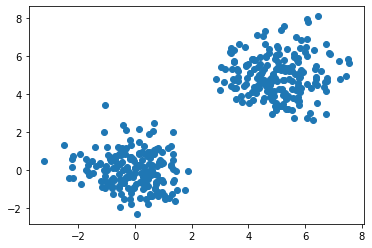

In [78]:
# Display scatter plot

plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

Linear Kernel Equation:

f(X) = w^T * X + b

w=weight

X=data

b=linear coefficient

In [79]:
# Initialize SVM 
sv = svm.SVC(kernel='linear')

# Fit training data
sv = sv.fit(X_train, y_train)

# Generate predictions for test set
pred = sv.predict(X_test)

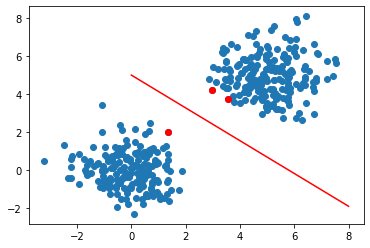

In [80]:
# Finding support vectors
sp_v = sv.support_vectors_

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(sp_v[:,0], sp_v[:,1], color='red')

# Plot the decision boundary
# Weights for the linear SVM model
weight = sv.coef_[0]

# y offset
offset = -weight[0] / weight[1]

# x axis from 0 to 8
x_bound = np.linspace(0, 8)
# y axis values for decision boundary
y_bound = offset * x_bound - sv.intercept_[0] / weight[1]

plt.plot(x_bound, y_bound, color='red')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


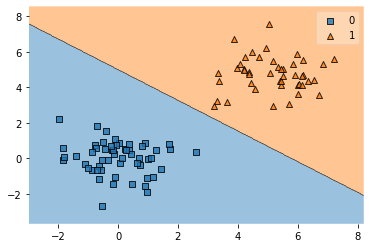

In [81]:
# Or use Mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, clf=sv)
plt.show()

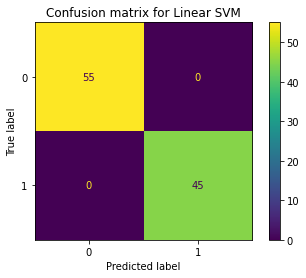

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [82]:
# Evaluate model
matrix = plot_confusion_matrix(sv, X_test, y_test)
plt.title('Confusion matrix for Linear SVM')
plt.show(matrix)
plt.show()

print(classification_report(y_test,pred))

# Non-Linear SVM

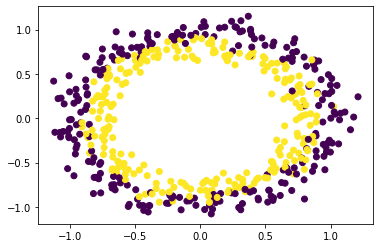

In [90]:
# Generate non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=500, noise=0.08)

plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [84]:
# Non-Linear SVM (RBF-Gaussian Radial Basis Function)
rbf = svm.SVC(kernel='rbf')

# Fit the training data
rbf.fit(circle_X, circle_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
# Plot the decision boundary
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

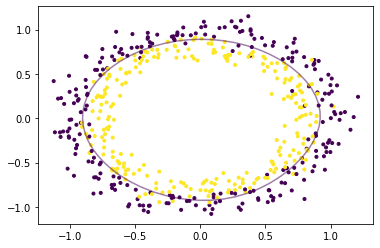

In [93]:
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plot_decision_boundary(rbf)
plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1], facecolors='none')
plt.show()